In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\DELL\Downloads\SampleSuperstore.csv", encoding='latin1')
print(df)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156  11-08-2016  11-11-2016    Second Class   
1          2  CA-2016-152156  11-08-2016  11-11-2016    Second Class   
2          3  CA-2016-138688  06-12-2016   6-16-2016    Second Class   
3          4  US-2015-108966  10-11-2015  10-18-2015  Standard Class   
4          5  US-2015-108966  10-11-2015  10-18-2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1-21-2014   1-23-2014    Second Class   
9990    9991  CA-2017-121258   2-26-2017  03-03-2017  Standard Class   
9991    9992  CA-2017-121258   2-26-2017  03-03-2017  Standard Class   
9992    9993  CA-2017-121258   2-26-2017  03-03-2017  Standard Class   
9993    9994  CA-2017-119914  05-04-2017  05-09-2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

# Convert 'Order Date' to datetime format

In [3]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create a new column for Month-Year

In [4]:
df['Month-Year'] = df['Order Date'].dt.to_period('M')

 # Group by Month-Year and sum Sales

In [5]:
monthly_sales = df.groupby('Month-Year')['Sales'].sum().reset_index()
monthly_sales['Month-Year'] = monthly_sales['Month-Year'].astype(str)

# Plotting

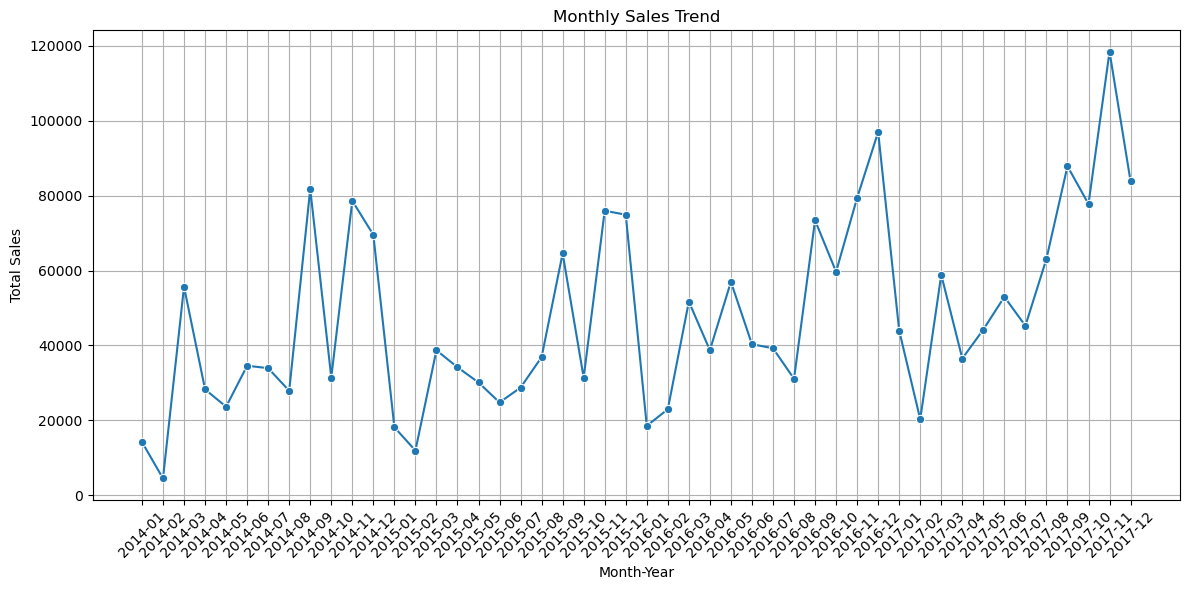

In [6]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month-Year', y='Sales', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.grid(True)
plt.show()